**i. PERKENALAN**

* Nama: Farih Ikmaliyani
* Batch: RMT-030
* Dataset: Dataset menggunakan Sport Cars Prices Dataset yang berasal dari https://www.kaggle.com/datasets/rkiattisak/sports-car-prices-dataset/data. Dataset memiliki 8 kolom yang memuat data mengenai jenis mobil, merk/brand, harga, serta kemampuannya dalam hal akselerasi kecepatan.
* Objektif: Menganalisa hubungan antara harga mobil sport dengan merk dan fiturnya.

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging!

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

3. Jelaskan apa yang dimaksud dengan Cross Validation !



**ii. IMPORT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import warnings
import json
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

**iii. DATA LOADING**

In [2]:
# Muat data dalam bentuk csv ke Colab dan diberi nama df1.

df1 = pd.read_csv('Sport car price.csv')

In [3]:
# Cek data yang sudah dimuat.

df1

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


In [4]:
# Cek 10 data teratas.

df1.head(10)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
5,BMW,M8,2022,4.4,617,553,3.1,"130,000"
6,Mercedes-Benz,AMG GT,2021,4,523,494,3.8,"118,500"
7,Chevrolet,Corvette,2021,6.2,490,465,2.8,"59,900"
8,Ford,Mustang Shelby GT500,2022,5.2,760,625,3.5,"81,000"
9,Nissan,GT-R Nismo,2021,3.8,600,481,2.5,"212,000"


In [5]:
# Cek 10 data terbawah.

df1.tail(10)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
997,Chevrolet,Camaro,2021,6.2,455,455,4,"25,000"
998,Ford,Mustang,2021,2.3,310,350,5.3,"27,205"
999,Nissan,370Z,2021,3.7,332,270,5.1,"30,090"
1000,Aston Martin,Vantage,2021,4,503,505,3.6,"146,000"
1001,Bugatti,Chiron,2021,8,1479,1180,2.4,"3,000,000"
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"
1006,Rimac,Nevera,2021,Electric Motor,1888,1696,1.85,"2,400,000"


In [6]:
# Cek informasi tipe data dalam dataset.

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


Dari data di atas dapat dilihat bahwa:
 1. Tipe data dalam dataset yaitu object dan interger
 2. Di kolom Engine Size (L) dan Torque (lb-ft) memiliku data null atau kosong karena datanya tidak genap 1007 baris (full data seharusnya 1007 baris).
* Engine Size (L) memiliki 10 data null
* Torque (lb-ft) memiliki 3 data null



In [7]:
# Double check missing value.

missing_values = df1.isnull().sum()
print('Jumlah missing value :', (missing_values))

Jumlah missing value : Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64


Jumlah missing value terkonfirmasi melalui fungsi isnull.

In [8]:
print(df1.loc[:, df1.isnull().any()])

     Engine Size (L) Torque (lb-ft)
0                  3            331
1                5.2            443
2                3.9            561
3                5.2            406
4                  4            568
...              ...            ...
1002               5           1106
1003  Electric Motor           1254
1004               4            590
1005               6            738
1006  Electric Motor           1696

[1007 rows x 2 columns]


In [9]:
# Menghitung total jumlah missing value yang berada di kolom Engine Size (L)
missing_values_engine_size = df1['Engine Size (L)'].isnull().sum()

# Menghitung total jumlah data yang berada di kolom Engine Size (L)
total_data_engine_size = len(df1['Engine Size (L)'])

# Menghitung total persentase missing values pada kolom price dibandingkan dengan total jumlah data yang berada di kolom Engine Size (L)
persentase_missing_values_engine_size = (missing_values_engine_size / total_data_engine_size) * 100

print('Total missing value pada Engine Size (L): ', missing_values_engine_size)
print('Total data pada Engine Size (L): ', total_data_engine_size)
print(f"Persentase missing value terhadap total data pada kolom Engine Size (L) sebesar: {persentase_missing_values_engine_size: .2f}% ")

Total missing value pada Engine Size (L):  10
Total data pada Engine Size (L):  1007
Persentase missing value terhadap total data pada kolom Engine Size (L) sebesar:  0.99% 


In [10]:
# Menghitung total jumlah missing value yang berada di kolom Torque (lb-ft)
missing_values_torque = df1['Torque (lb-ft)'].isnull().sum()

# Menghitung total jumlah data yang berada di kolom Torque (lb-ft)
total_data_torque = len(df1['Torque (lb-ft)'])

# Menghitung total persentase missing values pada kolom price dibandingkan dengan total jumlah data yang berada di kolom Torque (lb-ft)
persentase_missing_values_torque = (missing_values_torque / total_data_torque) * 100

print('Total missing value pada Torque (lb-ft): ', missing_values_torque)
print('Total data pada Torque (lb-ft): ', total_data_torque)
print(f"Persentase missing value terhadap total data pada kolom Torque (lb-ft) sebesar: {persentase_missing_values_torque: .2f}% ")

Total missing value pada Torque (lb-ft):  3
Total data pada Torque (lb-ft):  1007
Persentase missing value terhadap total data pada kolom Torque (lb-ft) sebesar:  0.30% 


Karena misisng value column diatas tidak dipengaruhi dari beberapa kolom dan tegolong random maka bisa dikategorikan sebagai missing value MCAR. Handling missing value berkategorikan MCAR bisa dilakukan dengan drop missing value. Karena missing value data bisa dihilangkan, persentasenya kecil, dan tidak mempengaruhi isi dataset secara signifikan, maka dilakukan drop missing value.

In [11]:
# Menghapus baris-baris data yang memiliki NA value.

df2 = df1.dropna()

In [12]:
# Cek info data type dataset setelah dilakukan penghapusan (dropna).

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 995 non-null    object
 1   Car Model                995 non-null    object
 2   Year                     995 non-null    int64 
 3   Engine Size (L)          995 non-null    object
 4   Horsepower               995 non-null    object
 5   Torque (lb-ft)           995 non-null    object
 6   0-60 MPH Time (seconds)  995 non-null    object
 7   Price (in USD)           995 non-null    object
dtypes: int64(1), object(7)
memory usage: 70.0+ KB


In [13]:
# Cek dataset setelah didrop missing value.

df2.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [14]:
# Ubah nama kolom "Car Make" menjadi "Brand" karena lebih mudah dipahami dan menamainya variabel 'df3'.

df3 = df2.rename(columns={"Car Make": "Brand"})
df3

,Brand,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


In [15]:
# Menampilkan unik value di setiap kolom

df3.nunique()

Brand                       38
Car Model                  176
Year                         9
Engine Size (L)             45
Horsepower                 121
Torque (lb-ft)              92
0-60 MPH Time (seconds)     43
Price (in USD)             367
dtype: int64

In [26]:
# Menampilkan dan mengecek data duplikat yang ada di dalam dataset

df3.duplicated().sum()

288

Dataset di atas memiliki 288 data yang duplikat. Maka akan dilakukan proses removal (drop).

In [27]:
# Drop/hapus data duplikat di semua kolom dan row.

df4 = df3.drop_duplicates()

In [29]:
# Cek jumlah data tersisa/detail.

df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    707 non-null    object 
 1   Car Model                707 non-null    object 
 2   Year                     707 non-null    int64  
 3   Engine Size (L)          707 non-null    object 
 4   Horsepower               707 non-null    object 
 5   Torque (lb-ft)           707 non-null    object 
 6   0-60 MPH Time (seconds)  707 non-null    object 
 7   Price (in USD)           707 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 49.7+ KB


**iv. EXPLOLATORY DATA ANALYSIS (EDA)**

In [30]:
df4.describe()

,Year,Price (in USD)
count,707.000000,7.070000e+02
mean,2021.151344,3.808800e+05
std,2.347564,7.652793e+05
min,1965.000000,2.500000e+04
25%,2021.000000,7.000000e+04
50%,2021.000000,1.324000e+05
75%,2022.000000,2.250000e+05
max,2023.000000,5.200000e+06


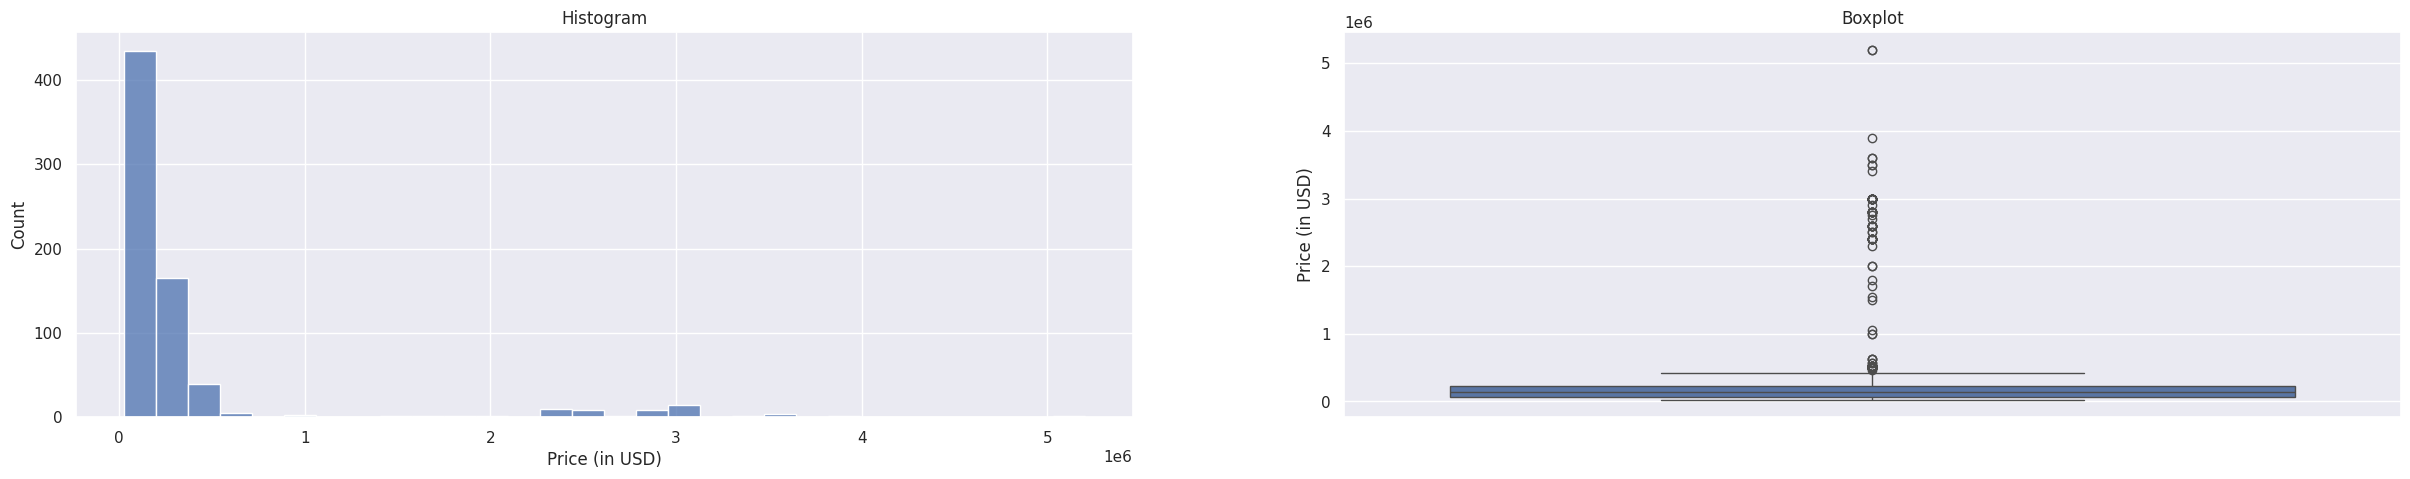

In [34]:
# Membuat fungsi untuk mengecek outlier price dengan menggunakan histogram dan bo

# Define figure size
plt.figure(figsize=(30, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df4['Price (in USD)'], bins=30)
plt.title('Histogram')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df4['Price (in USD)'])
plt.title('Boxplot')

plt.show()

Berdasarkan data di atas dapat diketahi bahwa terdapat outlier, dimana pada Grafik Histogram terdapat harga yang paling mendominasi di harga < 800.000 dollar dan pada boxplot terdapat informasi bahwa data didominasi diluar rentang.

In [35]:
# Menampilkan rata-rata harga berdasarkan merk mobil (Brand).

df4.groupby('Brand')['Price (in USD)'].mean()

Brand
Acura            1.581650e+05
Alfa Romeo       7.459967e+04
Alpine           7.150000e+04
Ariel            7.500000e+04
Aston Martin     2.224352e+05
Audi             9.135337e+04
BMW              8.064097e+04
Bentley          2.161760e+05
Bugatti          3.386333e+06
Chevrolet        5.465270e+04
Dodge            7.166649e+04
Ferrari          3.000600e+05
Ford             2.328552e+05
Jaguar           7.643810e+04
Kia              5.220000e+04
Koenigsegg       2.900000e+06
Lamborghini      4.732617e+05
Lexus            9.383333e+04
Lotus            6.072589e+05
Maserati         1.464203e+05
Mazda            2.683000e+04
McLaren          3.216477e+05
Mercedes-AMG     1.538000e+05
Mercedes-Benz    1.615324e+05
Nissan           4.681161e+04
Pagani           2.809091e+06
Pininfarina      2.500000e+06
Polestar         1.550000e+05
Porsche          1.350485e+05
Rimac            2.400000e+06
Rolls-Royce      3.335944e+05
Shelby           1.000000e+06
Subaru           3.817000e+04
TVR 

<ipython-input-36-c0ebe1954f98>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Price (in USD)', palette= sns.color_palette(), data=df4)
<ipython-input-36-c0ebe1954f98>:4: UserWarning: 
The palette list has fewer values (10) than needed (38) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Brand', y='Price (in USD)', palette= sns.color_palette(), data=df4)


<Axes: xlabel='Brand', ylabel='Price (in USD)'>

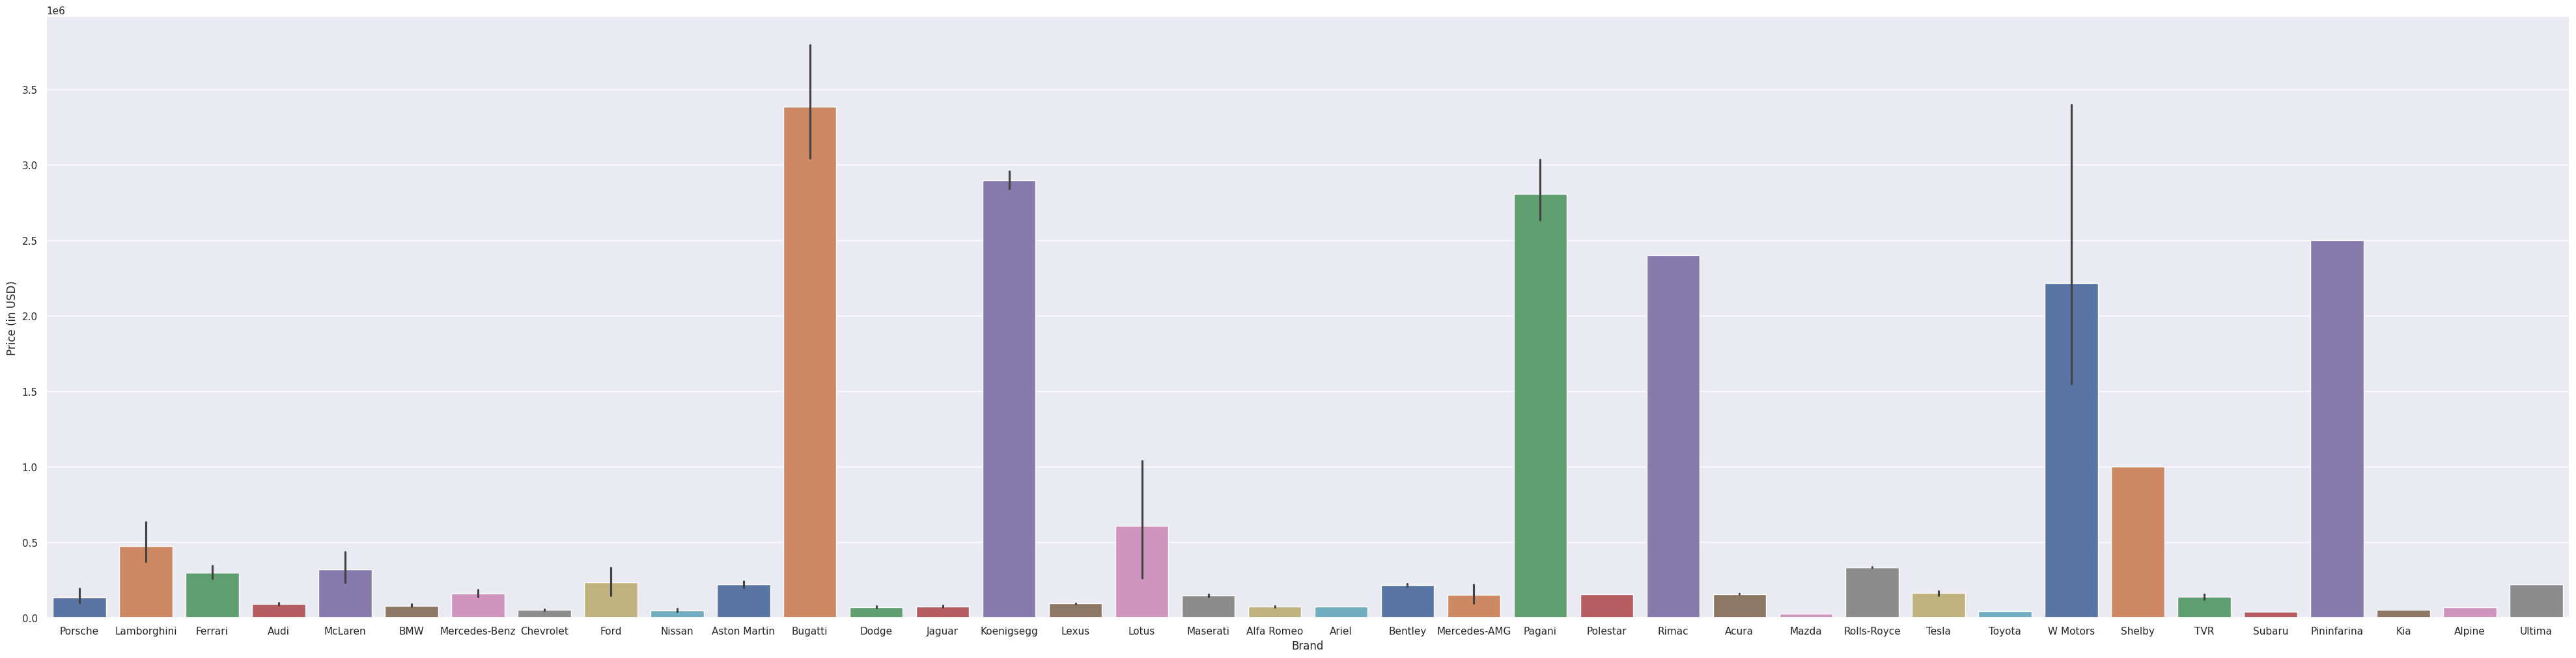

In [36]:
# Membuat barplot berdasarkan Brand dan Price (in USD).

sns.set(rc={'figure.figsize':(50,12)})
sns.barplot(x='Brand', y='Price (in USD)', palette= sns.color_palette(), data=df4)

Dari grafik di atas dapat dilihat bahwa beberapa Brand yang memiliki harga termahal (di atas yang lain) yaitu: Bugatti, Koenigsegg, Pagani, Rimac, W Motors, Pininfarina.

<Axes: xlabel='Brand', ylabel='count'>

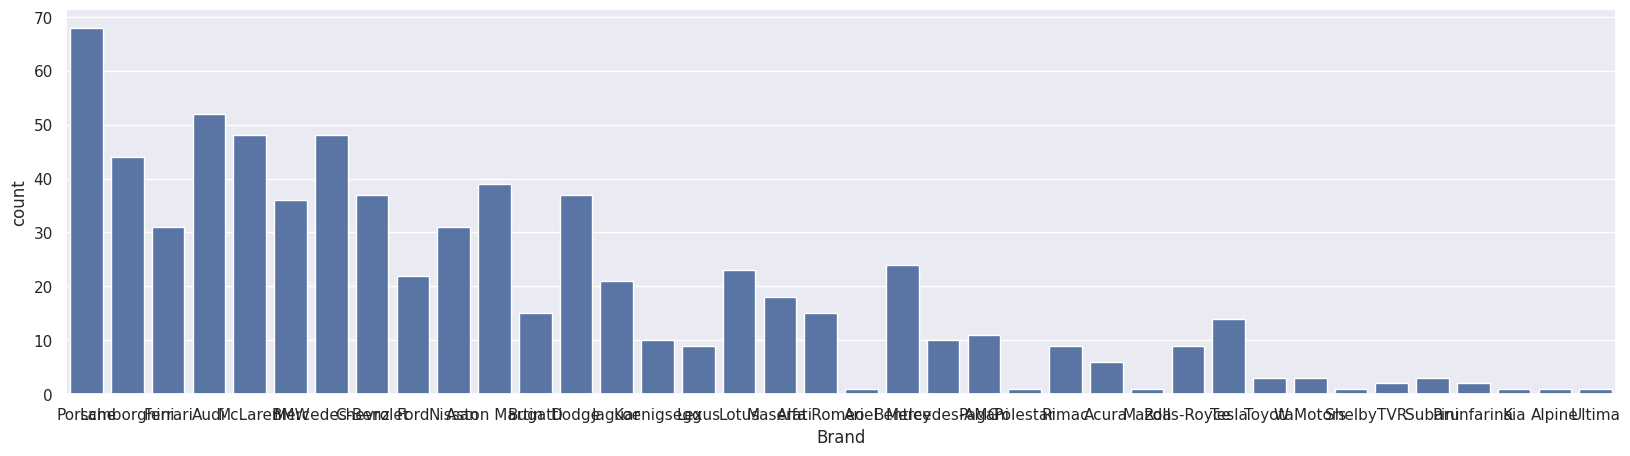

In [37]:
# Menampilkan barplot pada dataset.
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x='Brand', data=df4)

Supercar yang memiliki jumlah paling banyak adalah Porche.

<Axes: xlabel='Horsepower', ylabel='count'>

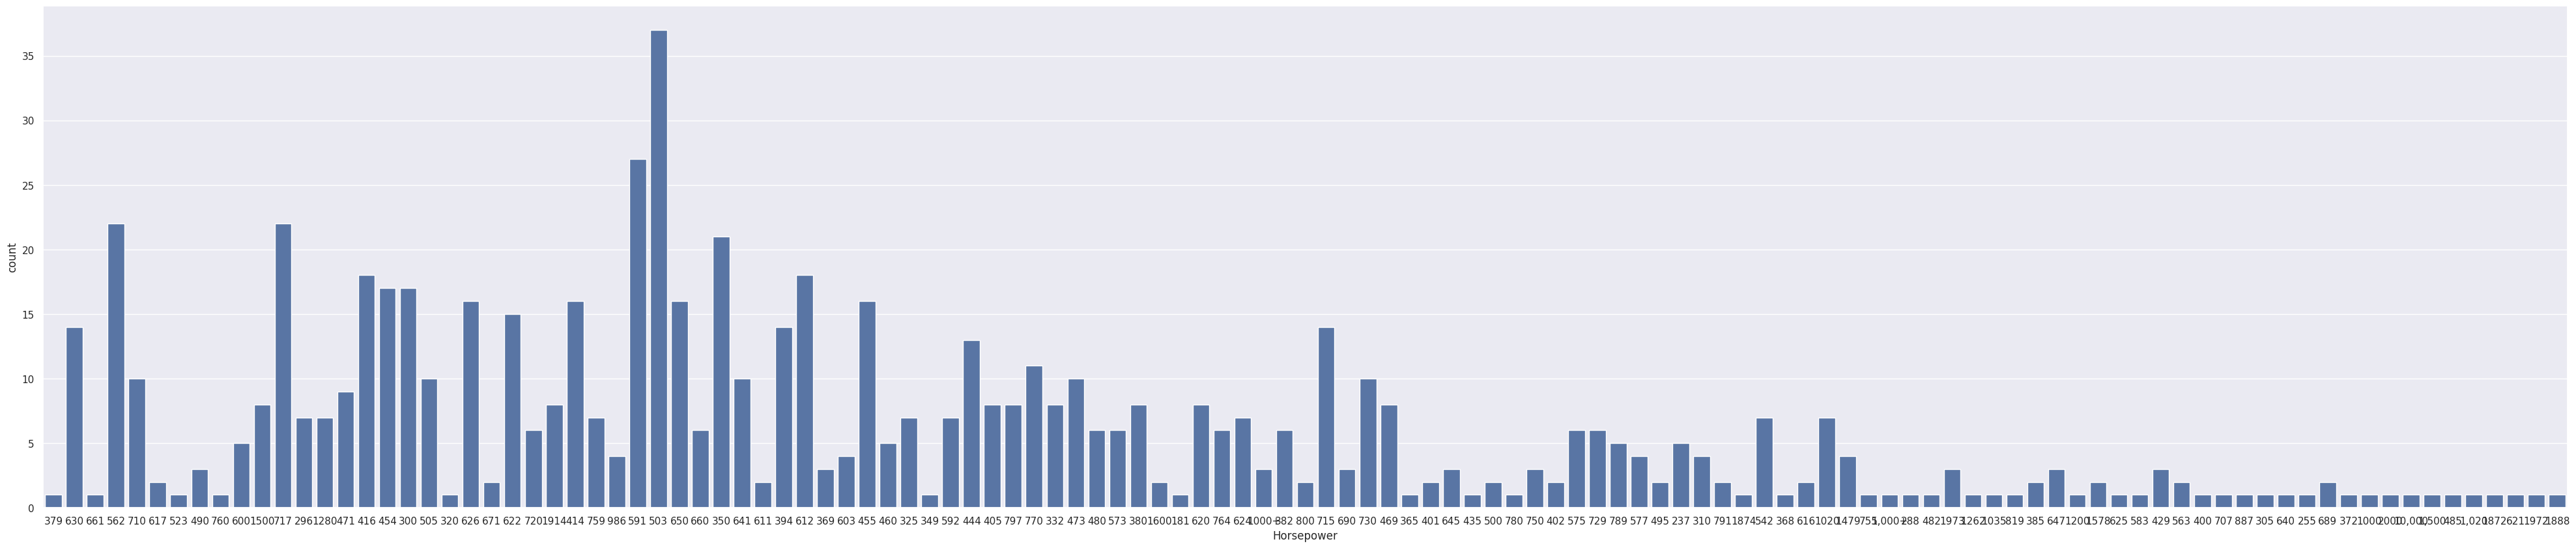

In [41]:
# Menampilkan barplot pada data Horsepower.

sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x='Horsepower', data=df4)

<Axes: xlabel='Engine Size (L)', ylabel='count'>

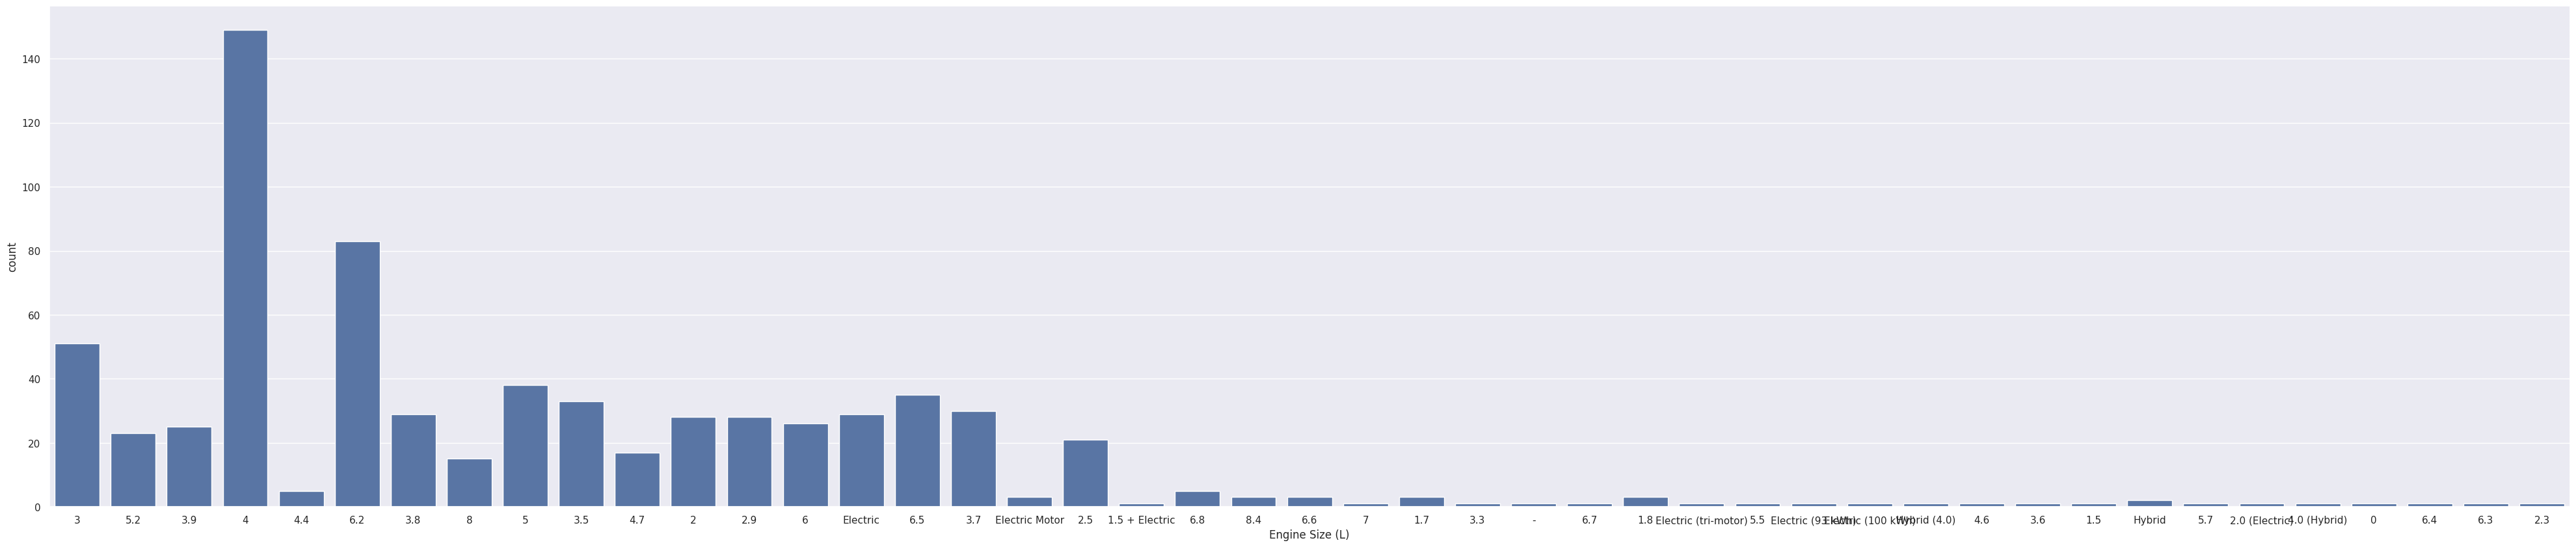

In [43]:
# Menampilkan barplot pada data Engine Size.

sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x='Engine Size (L)', data=df4)

Engine size paling banyak dipakai untuk Super Car adalah Engine size 4 dan diikuti oleh engine size 6.2.

<ipython-input-45-99662af278c3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', palette= cols, data=df4)


<Axes: xlabel='Year', ylabel='count'>

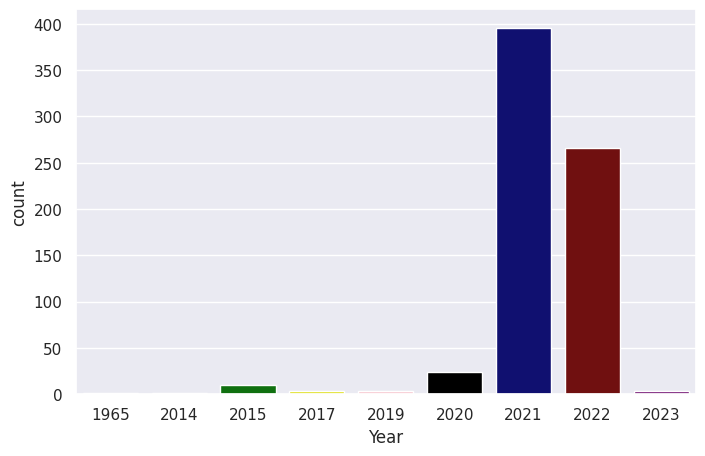

In [45]:
# Menampilkan barplot pada data tahun keluaran mobil.

sns.set(rc={'figure.figsize':(8,5)})
cols = cols = ['red', 'blue', 'green', 'yellow', 'pink', 'black', 'navy', 'maroon', 'purple']
sns.countplot(x='Year', palette= cols, data=df4)

Dari data di atas dapat dilihat bahwa tahun paling banyak untuk keluaran mobil sport adalah tahun 2021 kemudian tahun 2022. Terdapat hampir 400 jenis mobil di tahun 2021 dan 250-an jenis mobil di tahun 2022.

**v. FEATURE ENGINEERING**

Split Data X dan Y

In [ ]:
# Melakukan split data x dan y.

X = df4.drop(['Price (in USD)'],axis=1)
y = df4.price

X.head()

In [ ]:
# Melakukan split antara data train dan test menggunakan train_test_split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('X Train Size :', X_train.shape)
print('X Test Size :', X_test.shape)
print('y Train Size :', y_train.shape)
print('y Test Size :', y_test.shape)

**vi. MODEL DEFINITION**